# Simple Linear Regression

In [1]:
# Libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Problem One

Suppose an experiment involving 5 subjects is conducted to determine the relationship between
the percentage of a certain drug in the bloodstream and the length of time it takes to react to a
stimulus. The results are shown in the table.

| $i$ | $Amount\ of \ Drug\ (x)$ | $Reaction \ Time \ (y)$ | 
|:---:|:---:|:---:|
| $0$ | $1$ | $1$ |
| $1$ | $2$ | $1$ |
| $2$ | $3$ | $2$ |         
| $3$ | $4$ | $2$ |
| $4$ | $5$ | $4$ |

**a) Modeling**

- The simple linear regression model is $y = \beta_{0} + \beta_{1}x + \epsilon$, where $y$ is the reaction time, which is the dependent variable, the variable whose variation is to be explained. $x$ is the amount of drug, which is the independent or explanatory variable, $\beta_{0}$ is the y-intercept and $\beta_{1}$ is the slope of the line. $\beta_{0}$ and $\beta_{1}$ are the parameters to be estimated. $\epsilon$ is the unexplained, random or error component.


- From the sample of values of $x$ and $y$, estimates $\hat{\beta_{0}}$ of $\beta_{0}$ and $\hat{\beta_{0}}$ of $\beta_{1}$ are obtained using the least squares for this problem.


- The resulting estimate of the model is as follows
$$\hat{y_i} = \hat{\beta_{0}} + \hat{\beta_{1}}x_i$$


- where,  
$$\hat{\beta_{1}} = \frac {SS_{xy}}{SS_{xx}} = \frac {\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_i^n(x_i - \bar{x})^2}$$

- and
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} \bar{x}$$


Now let us solve for $\hat{\beta_{1}}$:

$$\bar{x} = \frac {1+2+3+4+5}{5}= \frac{15}{5}=3$$ 

$$\bar{y} = \frac {1+1+2+2+4}{5}= \frac{10}{5}=2$$

<br>

| $x$ | $y$ | $(x_i - \bar{x})$ | $(y_i - \bar{y})$ | $(x_i - \bar{x})(y_i - \bar{y})$ | $(x_i - \bar{x})^2$ |
|:---:|:---:|:-----------------:|:-----------------:|:--------------------------------:|:-------------------:|
| $1$ | $1$ |  $(1 - 3) = -2$   |  $(1 - 2) = -1$	|           $(-2)(-1) = 2$	       |     $(-2)^2 = 4$    |
| $2$ | $1$ |  $(2 - 3) = -1$   |  $(1 - 2) = -1$	|           $(-1)(-1) = 1$         |     $(-1)^2 = 1$    |
| $3$ | $2$ |  $(3 - 3) = 0$    |  $(2 - 2) = 0$	|           $(0)(0) = 0$           |     $(0)^2  = 0$    |          
| $4$ | $2$ |  $(4 - 3) = 1$    |  $(2 - 2) = 0$	|           $(1)(0) = 0$           |     $(1)^2  = 1$    |
| $5$ | $4$ |  $(5 - 3) = 2$    |  $(4 - 2) = 2$	|           $(2)(2) = 4$           |     $(2)^2  = 4$    |
|     |     |                   |     $sum: $     	|               $7$                |          $10$       |


$$\hat{\beta_{1}} = \frac{7}{10} = 0.7$$


$$\hat{\beta_{0}} = 2 - .7(3) = -0.1‬$$


Hence, 


$$\hat{y_i} = -0.1‬ + \ 0.7(x_i)$$

**Verifying the answers using sklearn**

In [2]:
# Get the dataset
expeirment_data = pd.read_csv(r'../data/drug-experiment-data.csv')

In [3]:
# We have to convert the columns into numpy arrays
# expeirment_data.iloc[:,0].value will extract the first column of expeirment_data
# reshape(-1,1) is needed to get a column vector

X = expeirment_data.iloc[:,0].values.reshape(-1, 1) 
Y = expeirment_data.iloc[:,1].values.reshape(-1, 1)

#Specify the regressor and fit the data
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
y_pred = regressor.predict(X)
y_pred

array([[0.6],
       [1.3],
       [2. ],
       [2.7],
       [3.4]])

In [5]:
# Computing the Coefficient (the slope of the line)
print(regressor.coef_)

[[0.7]]


In [6]:
# Computing the Y-intercept
print(regressor.intercept_)

[-0.1]


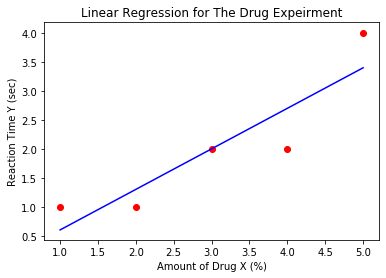

In [7]:
# Plot 
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.title('Linear Regression for The Drug Expeirment')
plt.xlabel('Amount of Drug X (%)')
plt.ylabel('Reaction Time Y (sec)')    
plt.show()

**b) Interpreting the estimated slope term.**

<div style="text-align: justify"> There is a positive, linear relationship between the amount of drug and reaction time. For every 1 percent increase in the amount of drug, the reaction time is expected to increase by .7 seconds.</div> 

**c) Suppose a patient had 2.5% of the drug, what is their predicted reaction time in seconds?**

Recall that 

$$\hat{y_i} = -0.1‬ + \ 0.7(x_i)$$

That is, 

$$\hat{Reaction \ Time} = -0.1‬ + \ 0.7(Amount \ of \ Drug)$$

$$\hat{Reaction \ Time} = -0.1‬ + \ 0.7(2.5) = 1.65 \ sec$$

**Verifying our answer to c)**

In [8]:
# Argument passed to prdeict must be 2d array
print(regressor.predict([[2.5]]))

[[1.65]]


**d) Computing $R^2$**

R² is a statistical measure in a regression model that
determines how well the data fit the regression model
(the goodness of fit).

- R² can take any value between 0 to 1.
- In general, the closer to 1, the better the model.

$$R^2 = 1 - \frac {Sum \ of \ squared \ distances \ between \ the \ actual \ and \ predicted \ Y \ values}{Sum \ of \ squared \ distances \ between \ the \ actual \ Y \ values \ and \ their \ mean}$$


$$R^2 = 1 - \frac {\sum_i^n (y_i - \hat{y_i})^2}{\sum_i^n (y_i - \bar{y})^2}$$



<br>

|  $x_i$  | $y_i$ | $\hat{y}$ | $(y_i - \hat{y_i})$ | $(y_i - \hat{y_i})^2$ |  $(y_i - \bar{y})$ | $(y_i - \bar{y})^2$ |
|:-------:|:-----:|:---------:|:-------------------:|:---------------------:|:--------------------:|:-----------------:|
|   $1$   |  $1$  |   $0.6$   |  	$\ \ \ 0.4$     |          $0.16$       |         $-1$         |         $1$       |
|   $2$   |  $1$  |   $1.3$   | 	  $-0.3$        |          $0.09$       |         $-1$         |         $1$       |
|   $3$   |  $2$  |   $2.0$   | 	 $\ \ \ 0$      |          $0$          |         $\ 0$        |         $0$       |  
|   $4$   |  $2$  |   $2.7$   | 	  $-0.7$        |          $0.49$       |         $\ 0$        |         $0$       |
|   $5$   |  $4$  |   $3.4$   | 	$\ \ \ 0.6$     |          $0.36$       |         $\ 2$        |         $4$       |
| $mean:$ |  $2$  |           |       $sum: $       |          $1.10$       |        $sum: $       |         $6$       |

So, 

$$R^2 = 1 - \frac {1.10}{6} \ = \ 0.82$$

**Verify result of d)**

In [9]:
# Computing R^2 using sklearn
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.8166666666666667

---

### Problem Two

Data on the average poverty rate and obesity percentage in all 50 states and D.C. were collected
over a period of three years: from 2008 to 2010. We want to explore the relationship between
poverty and obesity.

![](../util/img/problem-two-img-01.png)

![](../util/img/problem-two-img-02.png)

**a) Using linear regression to model the data, where the independent data (X) is the poverty rate, and the dependent data (Y) is the obesity percentage.**

In [10]:
# get the dataset
po_data = pd.read_csv(r'../data/poverty-and-obesity-data.csv')
po_data.head()

,x,y
0,16.1,32.3
1,10.8,25.9
2,19.2,25.4
3,16.5,30.6
4,15.4,24.8


In [11]:
X = po_data.iloc[:,0].values.reshape(-1, 1) 
Y = po_data.iloc[:,1].values.reshape(-1, 1) 
regressor.fit(X,Y)
y_pred = regressor.predict(X)

In [12]:
# Computing the Coefficient (the slope of the line)
print(regressor.coef_)

[[0.50964086]]


In [13]:
# Computing the Y-intercept
print(regressor.intercept_)

[20.32345114]


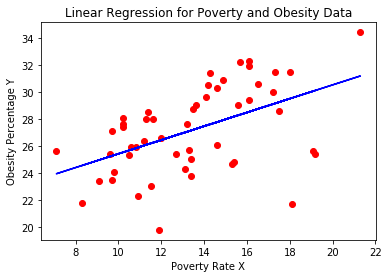

In [14]:
# plot using scatter plot
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.title('Linear Regression for Poverty and Obesity Data')
plt.xlabel('Poverty Rate X')
plt.ylabel('Obesity Percentage Y')
plt.show()

**b) Interpreting the estimated slope term.**

<div style="text-align: justify"> As may be seen in the scatter plot, the relationship between poverty rates and obesity percentages from 2008 to 2010 is linear, positive and of medium strength. For every 1 percent increase in the poverty rate, the obesity percentage is expected to increase by 0.51 points.</div>

**c) Compute $R^2$.**

In [15]:
# Compute the R^2 Score
r2_score(Y,y_pred)

0.25127447362473154

---
<h4><center>Works Cited<center><h4>

Tan, Pang-Ning, et al. *Introduction to Data Mining.* Pearson, 2020.

Khuri, Sami. "Chapter 03: Modeling and Prediction" Big Data and Machine Learning CSC410/610, 20 Feb. 2020, University of North Carolina at Greensboro. PDF presentation. 